In [1]:
import numpy as np
import pymc3 as pm
import corner
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

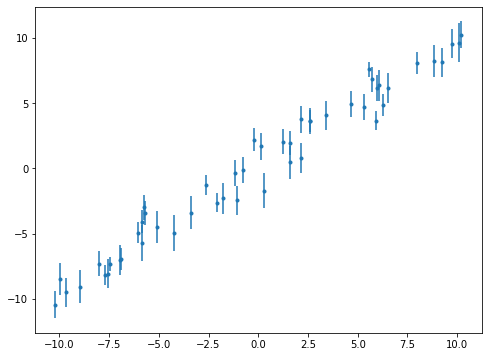

In [2]:
x = np.linspace(-10,10,50) + np.random.normal(scale=1,size=50)
y = np.linspace(-10,10,50) + np.random.normal(scale=0.5,size=50)
y_er = abs(np.random.normal(loc=1.0,scale=0.2,size=50))

plt.figure(figsize=(8,6))
plt.errorbar(x,y,y_er,fmt='.')

In [3]:
def my_fitting_model(x,m,b):
    return m*x+b

In [4]:
with pm.Model() as model:
    slope = pm.Uniform('slope',-20,20)
    intercept = pm.Uniform('intercept',-20,20)
    Y = pm.Normal('Y',mu=my_fitting_model(x,slope,intercept), sd=y_er, observed=y)
    trace = pm.sample(5000,tune=1000,chains=20,cores=6)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (20 chains in 6 jobs)
NUTS: [intercept, slope]
Sampling 20 chains: 100%|██████████| 120000/120000 [00:11<00:00, 10059.44draws/s]


/home/arash/anaconda3/lib/python3.6/site-packages/pymc3/stats.py:982: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
slope,0.966085,0.022949,0.000067,0.920264,1.010410,98904.406580,0.999980
intercept,0.335530,0.136516,0.000442,0.067276,0.602139,98976.974863,0.999987


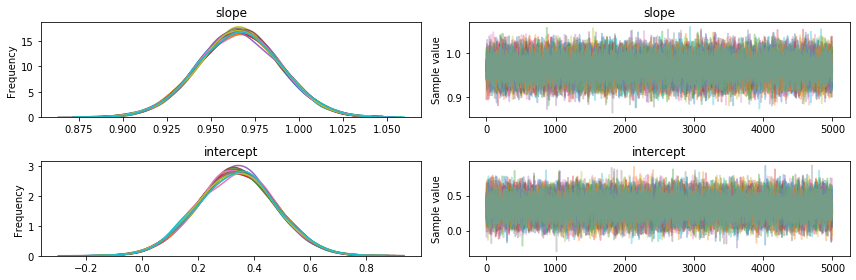

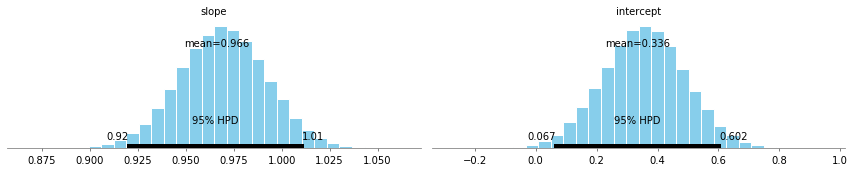

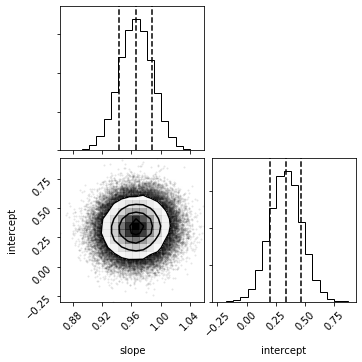

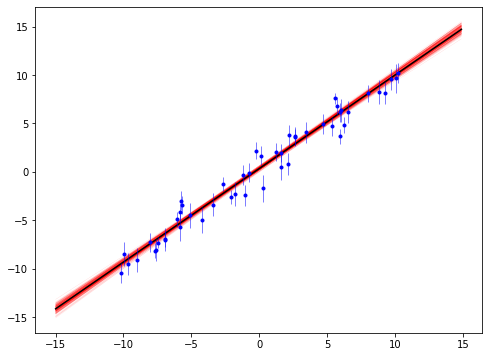

In [5]:
pm.traceplot(trace)
pm.posteriorplot.plot_posterior(trace)
corner_data = list(zip(*np.array([trace.get_values('slope').transpose(),trace.get_values('intercept').transpose()])))
cornplot = corner.corner(corner_data,quantiles=[0.16,0.5,0.84],labels = ['slope','intercept'])

plt.figure(figsize=(8,6))
plt_x = np.arange(-15,15,0.1)
plt.errorbar(x,y,y_er,fmt='.b',zorder=11,elinewidth=0.5)
plt.plot(plt_x, my_fitting_model(plt_x, 
                                 np.median(trace.get_values('slope')), 
                                 np.median(trace.get_values('intercept'))),'-k',zorder=10)

for i in np.random.randint(0,1000,size=200):
    plt.plot(plt_x, my_fitting_model(plt_x, 
                                     trace.get_values('slope')[i],
                                     trace.get_values('intercept')[i]),'r', lw=0.1, alpha=0.5)


pm.summary(trace)